# Module 2 Final Project
* Student: Emily J. Cain
* Date: December 2018
* Instructor: Rafael Carrasco

## Hypothesis 1
* H0 - Discount amount does not have a statistically significant effect on the quantity of the product ordered.
* H1 - Discount amount has a statistically significant effect on the quantity of the product ordered.

### Further Questions
* At what level(s) of discount? (Requirement)
* Does original unit price also have an effect? (Me)

## Hypothesis 2
* H0 - The top-performing employee sells approximately the same amount of products annually as the average employee.
* H2 - The top-performing employee sells more products annually than the average employee. 

## Hypothesis 3
* H0 - there is no significant difference in the sales of different products.
* H3 - Some products sell significantly better (or worse?) than the other products. 

## Hypothesis 4
* H0 -
* H4 - 

## Ideas
* Does the database show how long a customer has been with the company? Does customer loyalty have an effect on orders? Actionable - target specific customers
* Certain products and their sales - is there a product more popular in a certain regions where we could use targeted advertising? 
* Are there employees with a much higher sales rate than others? Maybe there should be a bonus for making a certain amount of sales. Possibly sort by region?
* What are the most popular products? What about offering sales on certain products - OR! Offering a discount on the products that are _already_ popular if they buy something else or spend a certain amount of money?? Ooohhh. But this doesn't count as a random sample?
* Are certain products always bought together? Is this something I can even figure out lol?
* Top customers?

In [1]:
# Notes to myself
# Active or passive tone when talking about rejecting the null hypothesis? Be consistent throughout.
# Be able to describe: log transformation, t-value, critical t-value
# Choose consistent color themes
# Show visualization of where the mean falls on the curve - do you need to divide your p-value by 2? Yes probably
# Be consistent with rounding

## Establish connection to the database

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
conn = sqlite3.connect('Northwind_small.sqlite')
c = conn.cursor()

## Grab table names

In [4]:
c.execute("SELECT name FROM sqlite_master WHERE type = 'table';").fetchall()

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

## Create dataframes of each table for initial inspection

In [5]:
employee_df = pd.read_sql_query('SELECT * FROM Employee;', conn)
employee_df.head()

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [6]:
category_df = pd.read_sql_query('SELECT * FROM Category;', conn)
category_df.head()

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"


In [7]:
customer_df = pd.read_sql_query('SELECT * FROM Customer;', conn)
customer_df.head()

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [8]:
shipper_df = pd.read_sql_query('SELECT * FROM Shipper;', conn)
shipper_df.head()

,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


In [9]:
supplier_df = pd.read_sql_query('SELECT * FROM Supplier;', conn)
supplier_df.head()

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,North America,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,North America,48104,USA,(313) 555-5735,(313) 555-3349,None
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,Eastern Asia,100,Japan,(03) 3555-5011,None,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Southern Europe,33007,Spain,(98) 598 76 54,None,None


Use square brackets when querying ```[Order]``` due to being a reserved keyword 

In [10]:
order_df = pd.read_sql_query('SELECT * FROM [Order];', conn)
order_df.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [11]:
product_df = pd.read_sql_query('SELECT * FROM Product;', conn)
product_df.head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [12]:
order_detail_df = pd.read_sql_query('SELECT * FROM OrderDetail;', conn)
order_detail_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [13]:
customer_customer_demo_df = pd.read_sql_query('SELECT * FROM CustomerCustomerDemo;', conn)
customer_customer_demo_df.head()

,Id,CustomerTypeId


In [14]:
customer_demographic_df = pd.read_sql_query('SELECT * FROM CustomerDemographic', conn)
customer_demographic_df.head()

,Id,CustomerDesc


In [15]:
region_df = pd.read_sql_query('SELECT * FROM Region;', conn)
region_df.head()

,Id,RegionDescription
0,1,Eastern
1,2,Western
2,3,Northern
3,4,Southern


In [16]:
territory_df = pd.read_sql_query('SELECT * FROM Territory;', conn)
territory_df.head()

,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1
3,02116,Boston,1
4,02139,Cambridge,1


In [17]:
employee_territory_df = pd.read_sql_query('SELECT * FROM EmployeeTerritory;', conn)
employee_territory_df.head()

,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833


## Hypothesis 1
* H0 - Discount amount does not have a statistically significant effect on the quantity of the product ordered.
* H1 - Discount amount has a statistically significant effect on the quantity of the product ordered.

### Further Questions
* At what level(s) of discount?
* Confidence Intervals?
* Is n large enough? 

### Hypothesis 1 Values
* H0: mu == 21.7 (quantity mean with no discount)
* HA: mu > 21.7 (discount has a statistically significant effect on the quantity ordered)

In [18]:
order_detail_df.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


In [19]:
quantity_discount_df = pd.read_sql_query('SELECT Quantity, Discount FROM OrderDetail', conn)
quantity_discount_df.head()

,Quantity,Discount
0,12,0.0
1,10,0.0
2,5,0.0
3,9,0.0
4,40,0.0


## Finding and Comparing the means
* Create one population of orders with no discount and find the mean
* Create another population of orders with discount and find the mean

In [20]:
c.execute('SELECT COUNT(Quantity) FROM OrderDetail WHERE Discount = 0.0').fetchall()

[(1317,)]

In [21]:
c.execute('SELECT COUNT(Quantity) FROM OrderDetail WHERE Discount != 0.0').fetchall()

[(838,)]

Create two different dataframes with the above queries

In [22]:
no_discount_df = pd.read_sql_query('SELECT Quantity, Discount FROM OrderDetail WHERE Discount = 0.0', conn)
no_discount_df.head()

,Quantity,Discount
0,12,0.0
1,10,0.0
2,5,0.0
3,9,0.0
4,40,0.0


In [23]:
no_discount_df.describe()

,Quantity,Discount
count,1317.000000,1317.0
mean,21.715262,0.0
std,17.507493,0.0
min,1.000000,0.0
25%,10.000000,0.0
50%,18.000000,0.0
75%,30.000000,0.0
max,130.000000,0.0


#### Distribution of Quantity with No Discount

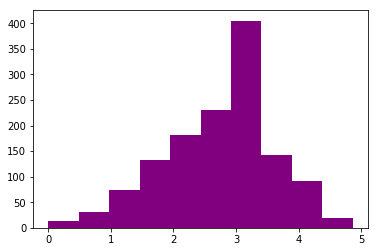

In [24]:
plt.hist(np.log(no_discount_df.Quantity), color='purple');

In [25]:
yes_discount_df = pd.read_sql_query('SELECT Quantity, Discount FROM OrderDetail WHERE Discount != 0.0', conn)
yes_discount_df.head()

,Quantity,Discount
0,35,0.15
1,15,0.15
2,6,0.05
3,15,0.05
4,40,0.05


In [26]:
yes_discount_df.describe()

,Quantity,Discount
count,838.000000,838.000000
mean,27.109785,0.144439
std,20.771439,0.071808
min,1.000000,0.010000
25%,12.000000,0.100000
50%,20.000000,0.150000
75%,36.000000,0.200000
max,130.000000,0.250000


#### Distribution of Quantity with Discount

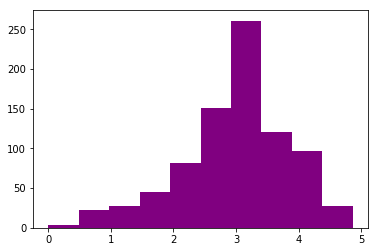

In [27]:
plt.hist(np.log(yes_discount_df.Quantity), color='purple');

In [28]:
mu1 = no_discount_df['Quantity'].mean()
std1 = no_discount_df['Quantity'].std(ddof=0)
print(f'No discount mean = {mu1}')
print(f'No discount standard deviation = {std1}')

No discount mean = 21.715261958997722
No discount standard deviation = 17.500845477669806


In [29]:
mu2 = yes_discount_df['Quantity'].mean()
std2 = yes_discount_df['Quantity'].std(ddof=0)
print(f'Yes discount mean = {mu2}')
print(f'Yes discount standard deviation = {std2}')

Yes discount mean = 27.10978520286396
Yes discount standard deviation = 20.759042075141373


In [30]:
t, p = stats.ttest_ind(no_discount_df['Quantity'], yes_discount_df['Quantity'])
# Divide this p-value by 2 since this is a one-tailed t-test
if p/2 < 0.05:
    print(f'With a p-value of {round(p,3)}, the null hypothesis can be rejected.')
else:
    print(f'With a p-value of {round(p,3)}, the null hypothesis cannot be rejected.')

With a p-value of 0.0, the null hypothesis can be rejected.


## Hypothesis 1 Conclusion
#### With a p-value of 0.0, the null hypothesis that discount does not have a statistically significant effect on the quantity of the product ordered can be rejected.

### Discount amount?

## Exploration of the Data

In [31]:
order_df.dtypes

Id                  int64
CustomerId         object
EmployeeId          int64
OrderDate          object
RequiredDate       object
ShippedDate        object
ShipVia             int64
Freight           float64
ShipName           object
ShipAddress        object
ShipCity           object
ShipRegion         object
ShipPostalCode     object
ShipCountry        object
dtype: object

In [32]:
order_df['OrderDate'] = pd.to_datetime(order_df['OrderDate'])

In [33]:
order_df.dtypes

Id                         int64
CustomerId                object
EmployeeId                 int64
OrderDate         datetime64[ns]
RequiredDate              object
ShippedDate               object
ShipVia                    int64
Freight                  float64
ShipName                  object
ShipAddress               object
ShipCity                  object
ShipRegion                object
ShipPostalCode            object
ShipCountry               object
dtype: object

In [34]:
# order_df.OrderDate.values

The dataset includes products ordered in 2012, 2013, and 2014. 

In [35]:
category_df

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


## Hypothesis 3
* H0 - There is no significant difference in the sales of different products. 
* H3 - Some products sell significantly better (or worse?) than the other products. 

### Hypothesis 3 Values
* H0: mu == 23.8 (mean of products sold)
* HA: sample > mu (one product sells better than the average product)

In [66]:
order_detail_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [67]:
product_df.head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [68]:
product_df.describe()

,Id,SupplierId,CategoryId,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,13.649351,4.116883,28.866364,40.506494,10.129870,12.467532,0.103896
std,22.371857,8.220267,2.395028,33.815111,36.147222,23.141072,10.931105,0.307127
min,1.000000,1.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7.000000,2.000000,13.250000,15.000000,0.000000,0.000000,0.000000
50%,39.000000,13.000000,4.000000,19.500000,26.000000,0.000000,10.000000,0.000000
75%,58.000000,20.000000,6.000000,33.250000,61.000000,0.000000,25.000000,0.000000
max,77.000000,29.000000,8.000000,263.500000,125.000000,100.000000,30.000000,1.000000


In [69]:
order_detail_df.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


In [74]:
total_products_sold_df = pd.read_sql_query('SELECT ProductId, Product.ProductName, SUM(Quantity) as Total FROM \
OrderDetail INNER JOIN Product ON Product.Id = OrderDetail.ProductId GROUP BY ProductId ORDER BY Total DESC;', conn)
total_products_sold_df.head(10)

,ProductId,ProductName,Total
0,60,Camembert Pierrot,1577
1,59,Raclette Courdavault,1496
2,31,Gorgonzola Telino,1397
3,56,Gnocchi di nonna Alice,1263
4,16,Pavlova,1158
5,75,Rhönbräu Klosterbier,1155
6,24,Guaraná Fantástica,1125
7,40,Boston Crab Meat,1103
8,62,Tarte au sucre,1083
9,2,Chang,1057


In [75]:
total_products_sold_df.tail(10)

,ProductId,ProductName,Total
67,32,Mascarpone Fabioli,297
68,74,Longlife Tofu,297
69,73,Röd Kaviar,293
70,66,Louisiana Hot Spiced Okra,239
71,50,Valkoinen suklaa,235
72,67,Laughing Lumberjack Lager,184
73,48,Chocolade,138
74,37,Gravad lax,125
75,15,Genen Shouyu,122
76,9,Mishi Kobe Niku,95


In [86]:
camembert_sales = pd.read_sql_query('SELECT ProductName, OrderDetail.Quantity FROM Product INNER JOIN OrderDetail ON \
Product.Id = OrderDetail.ProductId WHERE Product.Id = 60;', conn)
camembert_sales.head()

,ProductName,Quantity
0,Camembert Pierrot,40
1,Camembert Pierrot,35
2,Camembert Pierrot,20
3,Camembert Pierrot,21
4,Camembert Pierrot,8


In [87]:
camembert_sales.describe()

,Quantity
count,51.000000
mean,30.921569
std,23.077992
min,2.000000
25%,15.000000
50%,24.000000
75%,42.500000
max,100.000000


In [88]:
all_sales = pd.read_sql_query('SELECT ProductId, Product.ProductName, OrderDetail.Quantity FROM OrderDetail INNER \
JOIN Product ON Product.Id = OrderDetail.ProductId ORDER BY OrderDetail.Quantity DESC;', conn)
all_sales.head()

,ProductId,ProductName,Quantity
0,39,Chartreuse verte,130
1,64,Wimmers gute Semmelknödel,130
2,55,Pâté chinois,120
3,55,Pâté chinois,120
4,27,Schoggi Schokolade,120


In [89]:
all_sales.describe()

,ProductId,Quantity
count,2155.000000,2155.000000
mean,40.793039,23.812993
std,22.159019,19.022047
min,1.000000,1.000000
25%,22.000000,10.000000
50%,41.000000,20.000000
75%,60.000000,30.000000
max,77.000000,130.000000


In [93]:
sample_mean = camembert_sales.Quantity.mean()
sample_std = camembert_sales.Quantity.std()

pop_mean = all_sales.Quantity.mean()
pop_std = all_sales.Quantity.std()

print(f'Sample mean: {sample_mean}')
print(f'Sample standard deviation: {sample_std}')
print(f'Population mean: {pop_mean}')
print(f'Population standard deviation: {pop_std}')

Sample mean: 30.92156862745098
Sample standard deviation: 23.07799223264875
Population mean: 23.812993039443157
Population standard deviation: 19.022046977493563


In [95]:
t, p = stats.ttest_1samp(camembert_sales.Quantity, pop_mean)
print(f't-value: {t}')
print(f'p-value: {p}')

if p < 0.05:
    print('With a p-value < 0.05, the null hypothesis can be rejected.')
else:
    print('With a p-value > 0.05, the null hypothesis cannot be rejected.')

t-value: 2.1997313838604335
p-value: 0.032476493895908995
With a p-value < 0.05, the null hypothesis can be rejected.


Confirm with critical t-value

In [98]:
d_freedom = len(camembert_sales) - 1
d_freedom

50

In [101]:
t_crit = stats.t.ppf(1-0.05, df=d_freedom)
print(f'Critical t-value: {t_crit}')

if t > t_crit:
    print('Results are statistically significant with a t-value that is greater than the critical t-value.')
else:
    print('Results are not statistically significant if the t-value is less than the critical t-value.')

Critical t-value: 1.6759050245283311
Results are statistically significant with a t-value that is greater than the critical t-value.


## Hypothesis 3 Conclusion
#### With a p-value of 0.03, the null hypothesis that all products sell equally well can be rejected. 

## Hypothesis 2
* H0 - The top-performing employee sells approximately the same amount of products as the average employee.
* H2 - The top-performing employee sells significantly more products than the average employee. 

### Hypothesis 2 Values
* H0: mu == X (amount of products sold by top employee)
* HA: mu < X

In [36]:
employee_sales_df = pd.read_sql_query('SELECT EmployeeId, SUM(OrderDetail.Quantity) AS Total FROM [Order] \
INNER JOIN OrderDetail ON [Order].Id = OrderDetail.OrderId GROUP BY EmployeeId ORDER BY Total DESC', conn)
employee_sales_df

,EmployeeId,Total
0,4,9798
1,3,7852
2,1,7812
3,2,6055
4,8,5913
5,7,4654
6,6,3527
7,5,3036
8,9,2670


In [39]:
top_sales = 9798
average_sales = int(round(employee_sales_df.Total.mean()))

print(f'The top employee has sold a total of {top_sales} products.')
print(f'The average employee sales total is {average_sales} products.')

The top employee has sold a total of 9798 products.
The average employee sales total is 5702 products.


In [38]:
employee_sales_df.describe()

,EmployeeId,Total
count,9.000000,9.000000
mean,5.000000,5701.888889
std,2.738613,2453.325674
min,1.000000,2670.000000
25%,3.000000,3527.000000
50%,5.000000,5913.000000
75%,7.000000,7812.000000
max,9.000000,9798.000000


#### I'M TRYING TO FIND EMPLOYEE SALES

In [49]:
employee_sales_and_dates_df = pd.read_sql_query('SELECT EmployeeId, OrderDate, OrderDetail.Quantity FROM [Order] \
INNER JOIN OrderDetail ON [Order].Id = OrderDetail.OrderId ORDER BY EmployeeId ASC;', conn)
employee_sales_and_dates_df.head(10)

,EmployeeId,OrderDate,Quantity
0,1,2012-07-17,50
1,1,2012-07-17,65
2,1,2012-07-17,6
3,1,2012-08-01,30
4,1,2012-08-01,25
5,1,2012-08-07,12
6,1,2012-08-07,6
7,1,2012-08-20,45
8,1,2012-08-20,40
9,1,2012-08-20,36


In [62]:
# Highest-performing employee
employee_4_sales = employee_sales_and_dates_df.loc[employee_sales_and_dates_df['EmployeeId'] == 4]
employee_4_sales.head()

,EmployeeId,OrderDate,Quantity
907,4,2012-07-08,10
908,4,2012-07-08,35
909,4,2012-07-08,15
910,4,2012-07-09,40
911,4,2012-07-09,25


In [63]:
# Lowest-performing employee
employee_9_sales = employee_sales_and_dates_df.loc[employee_sales_and_dates_df['EmployeeId'] == 9]
employee_9_sales.head()

,EmployeeId,OrderDate,Quantity
2048,9,2012-07-12,20
2049,9,2012-07-12,35
2050,9,2012-07-12,25
2051,9,2012-07-12,30
2052,9,2012-07-23,60


In [64]:
print(employee_4_sales.Quantity.mean())
print(employee_9_sales.Quantity.mean())

23.32857142857143
24.953271028037385


In [65]:
employee_sales_and_dates_df.Quantity.mean()

23.812993039443157

In [48]:
daily_sales_by_employee.describe()

,EmployeeId,Total
count,480.000000,480.000000
mean,4.343750,106.910417
std,2.458966,85.162195
min,1.000000,2.000000
25%,2.000000,47.750000
50%,4.000000,89.000000
75%,6.000000,144.250000
max,9.000000,708.000000


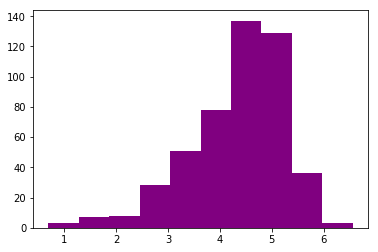

In [52]:
plt.hist(np.log(daily_sales_by_employee.Total), color='purple');

In [55]:
daily_sales_by_number_4 = pd.read_sql_query('SELECT EmployeeId, OrderDate, OrderDetail.Quantity FROM [Order] INNER \
JOIN OrderDetail ON [Order].Id = OrderDetail.OrderId WHERE EmployeeId = 4 GROUP BY OrderDate;', conn)
daily_sales_by_number_4.head()

,EmployeeId,OrderDate,Quantity
0,4,2012-07-08,15
1,4,2012-07-09,40
2,4,2012-07-16,15
3,4,2012-07-18,1
4,4,2012-07-19,20


In [54]:
daily_sales_by_number_4.describe()

,EmployeeId,SUM(OrderDetail.Quantity)
count,141.0,141.000000
mean,4.0,69.489362
std,0.0,57.982955
min,4.0,1.000000
25%,4.0,30.000000
50%,4.0,50.000000
75%,4.0,91.000000
max,4.0,325.000000


In [60]:
other_employee_sales = pd.read_sql_query('SELECT EmployeeId, SUM(OrderDetail.Quantity) AS Total FROM [Order] INNER \
JOIN OrderDetail ON [Order].Id = OrderDetail.OrderId WHERE EmployeeId != 4 GROUP BY OrderDetail.OrderId;', conn)
other_employee_sales.head()

,EmployeeId,Total
0,5,27
1,6,49
2,3,41
3,3,102
4,5,57


In [61]:
other_employee_sales.describe()

,EmployeeId,Total
count,674.000000,674.000000
mean,4.497033,61.600890
std,2.765875,50.427528
min,1.000000,1.000000
25%,2.000000,25.250000
50%,3.000000,50.000000
75%,7.000000,80.000000
max,9.000000,346.000000


In [62]:
top_mean = top_seller_sales.Total.mean()
pop_mean = other_employee_sales.Total.mean()

top_std = top_seller_sales.Total.std()
pop_std = other_employee_sales.Total.std()

print(f'Top seller mean: {top_mean}')
print(f'Top seller standard deviation: {top_std}')

print(f'All employees mean: {pop_mean}')
print(f'All employees standard deviation: {pop_std}')

Top seller mean: 62.80769230769231
Top seller standard deviation: 52.265218852856364
All employees mean: 61.60089020771513
All employees standard deviation: 50.42752791156563


#### Distribution of products sold per order

In [ ]:
plt.hist(np.log(sales_by_order_df.Total), color='purple');

In [ ]:
order_quantity_mean = round(sales_by_order_df.Total.mean(), 2)
order_quantity_mean

In [ ]:
sales_by_order_df.describe()

#### Select a random employee and compare their sales per order to the average sales per order

In [ ]:
# Seed the generator for reproducibility 
np.random.seed(42)
random_employee = np.random.randint(1,10)
random_employee

In [ ]:
number_7_sales_df = pd.read_sql_query('SELECT EmployeeId, OrderDetail.OrderId, SUM(OrderDetail.Quantity) AS Total \
FROM [Order] INNER JOIN OrderDetail ON [Order].Id = OrderDetail.OrderId GROUP BY OrderDetail.OrderId HAVING \
EmployeeId = 7;', conn)
number_7_sales_df.head(15)

In [ ]:
number_7_mean = round(number_7_sales_df.Total.mean(), 2)
number_7_mean

In [ ]:
popmean = order_quantity_mean
sample_mean = number_7_mean

pop_std = round(sales_by_order_df.Total.std(), 2)
sample_std = round(number_7_sales_df.Total.std(), 2)

print(f'Population mean of quantity sold by order: {popmean}')
print(f'Employee 7 mean quantity sold by order: {sample_mean}')
print(f'Population standard deviation: {pop_std}')
print(f'Sample standard deviation: {sample_std}')

In [ ]:
t, p = stats.ttest_1samp(number_7_sales_df.Total, popmean)
print(f't: {t}')
print(f'p: {p}')

In [ ]:
if p < 0.05:
    print(f'With a p-value of {round(p,3)}, the null hypothesis can be rejected.')
else:
    print(f'With a p-value of {round(p,3)}, the null hypothesis cannot be rejected.')

Confirm findings by comparing t-value with critical t-value

In [ ]:
critical_t = round((stats.t.ppf(1 - 0.05, 72 - 1)), 3)
critical_t

In [ ]:
if abs(t) < critical_t:
    print('If the absolute t-value is less than the critical t-value, the null hypothesis cannot be rejected.')

## Hypothesis 2 Conclusion
#### With a p-value that is greater than 0.05 and a t-value that is less than the critical t-value, the null hypothesis that some employees sell a statistically significant different amount per order than the average employee cannot be rejected.

## What I'd Actually Like to do with Hypothesis 2
* Compare total employee sales
* I HATE EMPLOYEE SALES